# Fourier series
In this notebook, Fourier series will be explained.

Waves of any shape can be modelled and described using Fourier series. 

The general Fourier series is of the form:
$y(t) = \frac{a_0}{2} + \sum_{n=1}^{n=\infty} a_n sin(n\omega t) +\sum_{m=1}^{m=\infty} b_m sin(m\omega t) $. 


Here, $$a_0 = \frac{2}{\tau} \int_{0}^{\tau} y(t) dt$$
$$a_n = \frac{2}{\tau} \int_{0}^{\tau} y(t)sin(n\omega t) dt$$
$$b_m = \frac{2}{\tau} \int_{0}^{\tau} y(t)cos(m\omega t) dt$$

In [26]:
import sympy as sym
from sympy import pi
import matplotlib.pyplot as plt
from scipy.signal import square
import numpy as np
import scipy.integrate as integrate

## Finding Fourier components

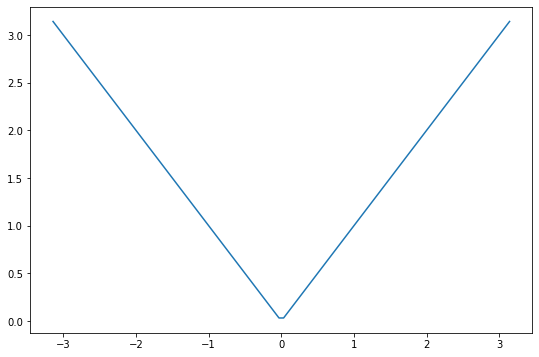

In [39]:
def triangle(x):
    if x>=0:
        return x
    else:
        return -x

def fourier(function, lower_limit, upper_limit, number_terms):
    l = (upper_limit-lower_limit)/2
    a0=1/l*integrate.quad(lambda x: function(x), lower_limit, upper_limit)[0]
    A = np.zeros((number_terms))
    B = np.zeros((number_terms))
     
    for i in range(1,number_terms+1):
        A[i-1]=1/l*integrate.quad(lambda x: function(x)*np.cos(i*np.pi*x/l), lower_limit, upper_limit)[0]
        B[i-1]=1/l* integrate.quad(lambda x: function(x)*np.sin(i*np.pi*x/l), lower_limit, upper_limit)[0]
 
    return [a0/2.0, A, B]

# plot triangle function
plt.figure(figsize=(9,6)) 
x = np.linspace(-np.pi, np.pi, 100)
triangle_values = [triangle(item) for item in x]
plt.plot(x, triangle_values)

In [42]:
traingle_coeffs = fourier(triangle, -np.pi, np.pi, 3)
print('Fourier coefficients for the Triangular wave for three harmonic numbers\n')
print('a0 ='+str(traingle_coeffs[0]))
print('an ='+str(traingle_coeffs[1]))
print('bn ='+str(traingle_coeffs[2]))

Fourier coefficients for the Triangular wave for three harmonic numbers

a0 =1.5707963267948966
an =[-1.27323954e+00  4.99600361e-16 -1.41471061e-01]
bn =[0. 0. 0.]


## Finding Fourier series using sympy module

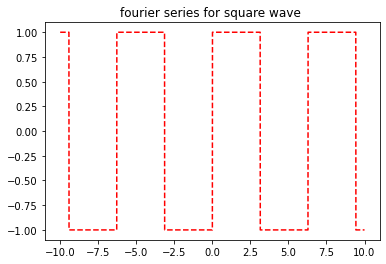

In [10]:
L=10
x=np.arange(-L,L,0.001)
y=square(x) # period of 2pi
plt.plot(x,y,'r--')
plt.title("fourier series for square wave ")
plt.show()

Figure above:

n(t) = -1, -$\pi$ < t < 0

n(t) = 1, 0< t < $\pi$ 

In [20]:
## Solving Fourier Series in Python
t = sym.symbols('t')

x = sym.Piecewise((-1, t<0), (1, t>0))
series = sym.fourier_series(x, (t, -pi, pi))
series.truncate(5)

4*sin(t)/pi + 4*sin(3*t)/(3*pi) + 4*sin(5*t)/(5*pi) + 4*sin(7*t)/(7*pi) + 4*sin(9*t)/(9*pi)

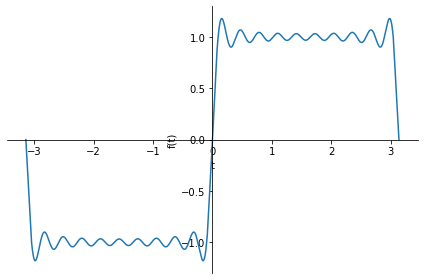

In [22]:
sym.plot(series.truncate(10), (t, -pi, pi))